In [2]:
import pandas as pd
from pandas import Series, DataFrame

In [3]:
titanic_df = pd.read_csv('train.csv')

In [5]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Question 1: Who were the passengers on the Titanic?

In [7]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

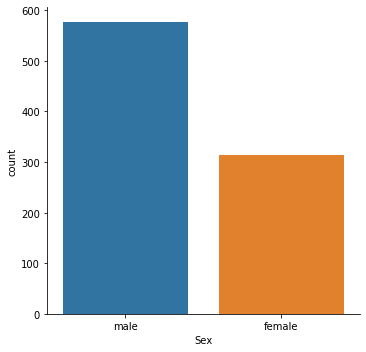

In [12]:
sns.catplot('Sex', data = titanic_df, kind = 'count')

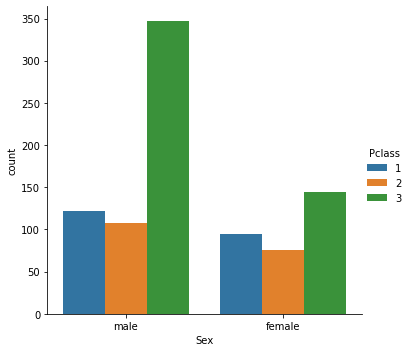

In [13]:
sns.catplot('Sex' , data = titanic_df, kind = 'count', hue = 'Pclass')

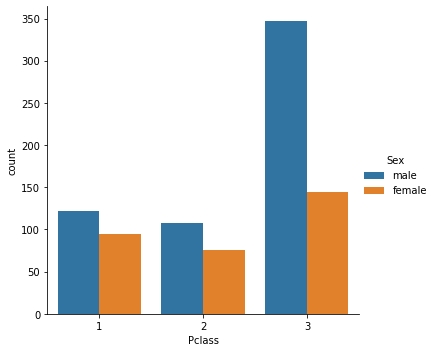

In [14]:
# or reversing the legend
sns.catplot('Pclass', data = titanic_df, kind = 'count', hue = 'Sex')

In [15]:
# split between males, women, children
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [16]:
#applying to the dataset
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis=1)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


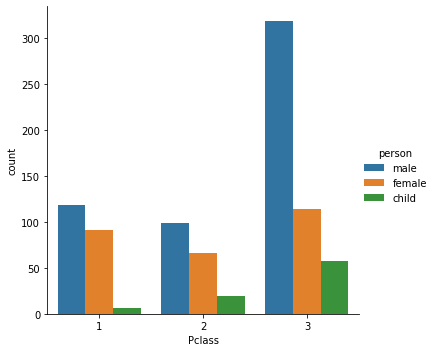

In [17]:
#showing the split the same
sns.catplot('Pclass', data = titanic_df, kind = 'count', hue = 'person')

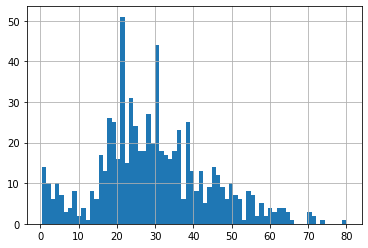

In [18]:
# distribution of ages
titanic_df['Age'].hist(bins=70)

In [19]:
titanic_df['Age'].mean()

29.69911764705882

In [21]:
# overall comparison, male, female, child
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

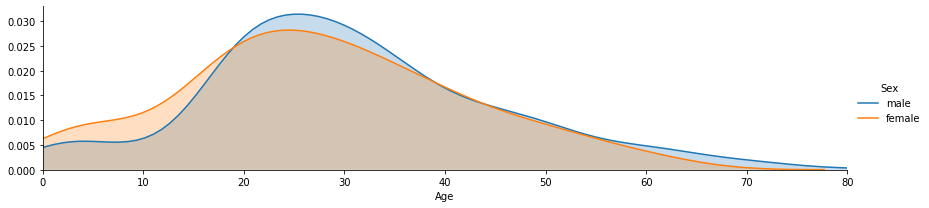

In [22]:
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect = 4)
fig.map(sns.kdeplot,'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim = (0, oldest))
fig.add_legend()

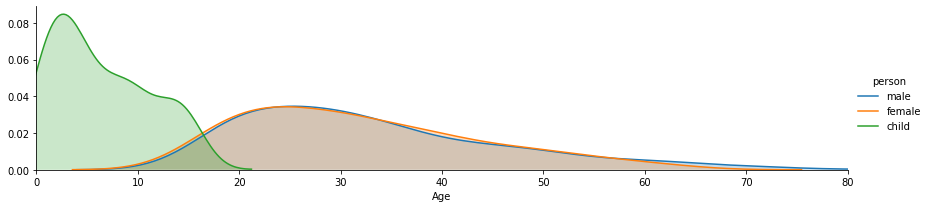

In [24]:
#showing children
fig = sns.FacetGrid(titanic_df, hue='person', aspect = 4)
fig.map(sns.kdeplot,'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim = (0, oldest))
fig.add_legend()

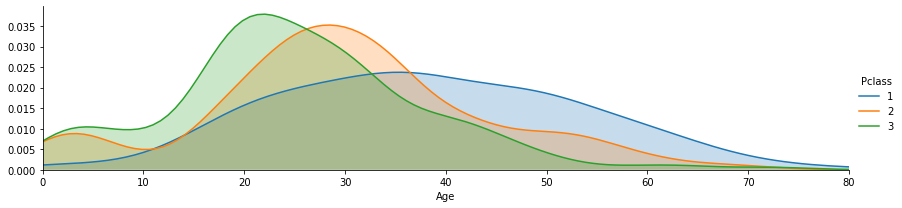

In [26]:
# doing it by class
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect = 4)
fig.map(sns.kdeplot,'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim = (0, oldest))
fig.add_legend()

### What deck were the passengers on?

In [28]:
deck  = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [40]:
# grab the levels
levels = []
for level in deck:
    levels.append(level[0])
print(levels)
levels.sort()
print(levels)


['C', 'C', 'E', 'G', 'C', 'D', 'A', 'C', 'B', 'D', 'B', 'C', 'B', 'C', 'F', 'F', 'C', 'E', 'A', 'D', 'D', 'C', 'B', 'E', 'D', 'F', 'D', 'C', 'B', 'F', 'C', 'E', 'B', 'A', 'C', 'F', 'A', 'F', 'B', 'B', 'G', 'A', 'D', 'D', 'C', 'C', 'C', 'D', 'G', 'C', 'B', 'E', 'B', 'C', 'C', 'C', 'D', 'A', 'B', 'D', 'C', 'C', 'B', 'E', 'C', 'C', 'E', 'C', 'B', 'C', 'E', 'C', 'D', 'B', 'C', 'C', 'C', 'E', 'T', 'F', 'C', 'F', 'C', 'E', 'D', 'B', 'E', 'C', 'B', 'D', 'G', 'C', 'E', 'C', 'E', 'B', 'C', 'A', 'C', 'C', 'C', 'E', 'D', 'E', 'E', 'D', 'A', 'B', 'C', 'B', 'C', 'D', 'C', 'B', 'C', 'E', 'D', 'F', 'B', 'B', 'C', 'B', 'B', 'B', 'C', 'C', 'A', 'E', 'C', 'E', 'E', 'C', 'A', 'E', 'B', 'D', 'A', 'C', 'F', 'D', 'D', 'D', 'A', 'B', 'B', 'D', 'A', 'D', 'E', 'C', 'B', 'B', 'D', 'B', 'B', 'C', 'F', 'C', 'E', 'E', 'C', 'C', 'C', 'F', 'C', 'E', 'E', 'B', 'B', 'D', 'C', 'B', 'B', 'D', 'E', 'B', 'B', 'D', 'E', 'F', 'B', 'B', 'D', 'B', 'D', 'B', 'A', 'E', 'B', 'B', 'E', 'B', 'E', 'C', 'C', 'D', 'E', 'D', 'A', 'D',

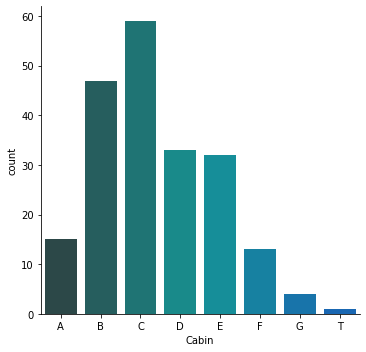

In [41]:
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin', data = cabin_df, palette='winter_d', kind='count')

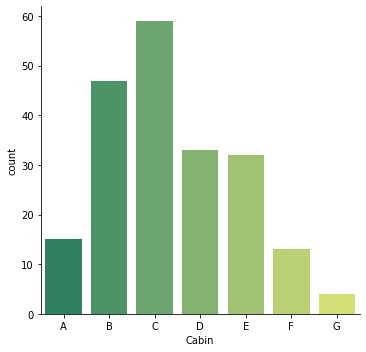

In [42]:
# drop the T cabins
cabin_df = cabin_df[cabin_df.Cabin != 'T']
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin', data = cabin_df, palette='summer', kind='count')

In [43]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


### Where did they come from?

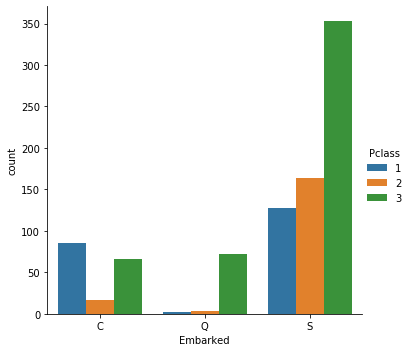

In [48]:
sns.factorplot('Embarked', data = titanic_df, hue='Pclass', order = ['C', 'Q', 'S'], kind = 'count')

### Who was alone and who was with family?

In [49]:
# what does alone mean?
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [50]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0


In [51]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = "With Family"
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = "Alone"

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [52]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


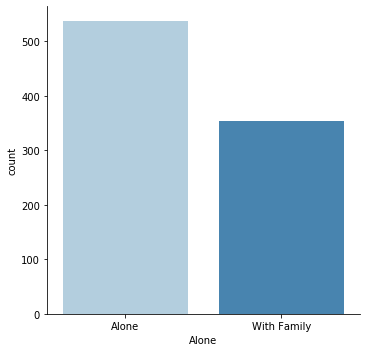

In [54]:
#factor plot
sns.factorplot('Alone', data= titanic_df, kind= 'count', palette = 'Blues', order = ['Alone', 'With Family'])

### What factors affected survival rates

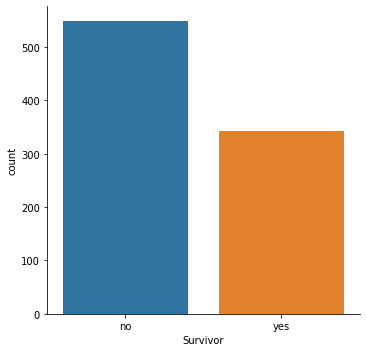

In [55]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})
sns.factorplot('Survivor', data = titanic_df, kind = 'count')

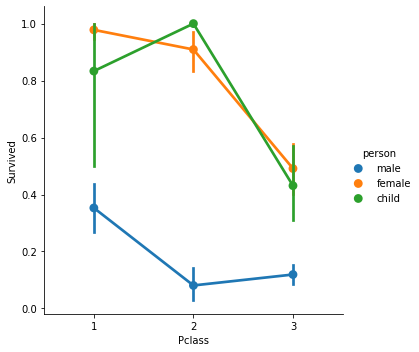

In [59]:
# was class a factor?
sns.factorplot('Pclass','Survived', hue = 'person', data = titanic_df)

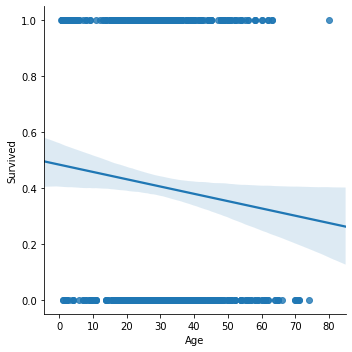

In [60]:
sns.lmplot('Age','Survived', data= titanic_df)

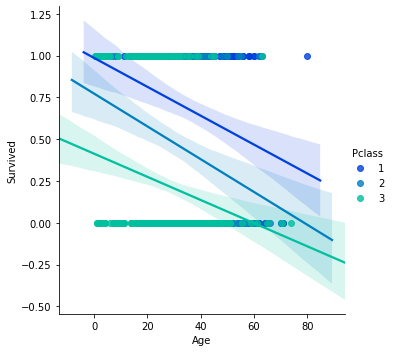

In [62]:
# class and age
sns.lmplot('Age','Survived', hue = 'Pclass', palette = 'winter', data= titanic_df)

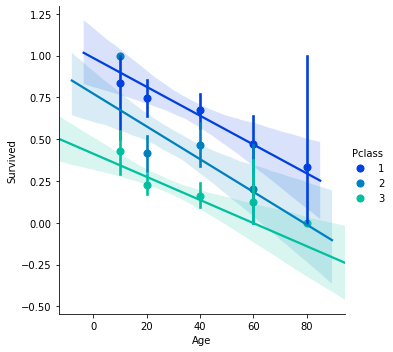

In [65]:
# tidying up: making some age bins
generations = [10, 20, 40, 60, 80]
sns.lmplot('Age','Survived', hue = 'Pclass', data=titanic_df, palette = 'winter', x_bins = generations)

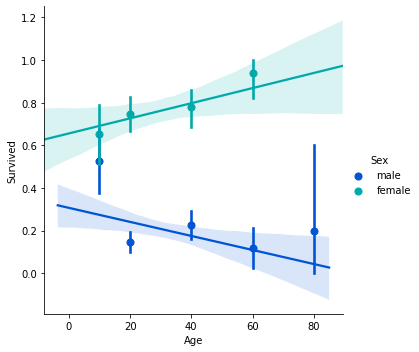

In [66]:
sns.lmplot('Age','Survived', hue = 'Sex', data=titanic_df, palette = 'winter', x_bins = generations)

### Did the deck affect survival rate?

In [68]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
person         891 non-null object
Alone          891 non-null object
Survivor       891 non-null object
dtypes: float64(2), int64(5), object(8)
memory usage: 104.5+ KB


In [88]:
# we need just the data where we DO know the deck
# This code below doesn't work
#deck_df = titanic_df.loc[titanic_df['Cabin'] != np.nan]

deck_df = titanic_df.dropna(subset =['Cabin'])
deck_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,no
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,With Family,yes
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,Alone,yes


In [92]:
def get_deck(cabin):
    return(cabin[0])
        
deck_df['Deck'] = deck_df.apply(lambda x: get_deck(x['Cabin']), axis=1)
deck_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,no,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,With Family,yes,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,Alone,yes,C


In [99]:
deck_df = deck_df[deck_df.Cabin != 'T']

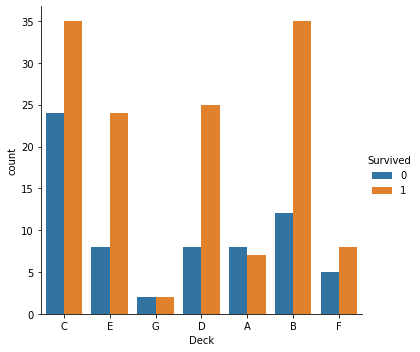

In [100]:
sns.factorplot('Deck', hue = 'Survived', data = deck_df, kind='count')

In [105]:
deck_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,no,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,With Family,yes,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,Alone,yes,C


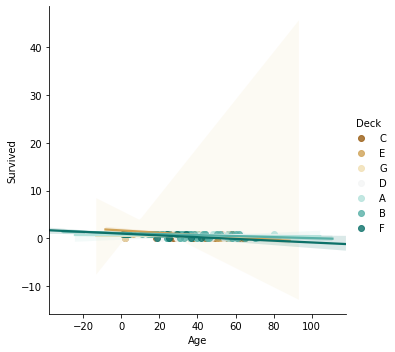

In [121]:
sns.lmplot('Age','Survived', hue = 'Deck', data=deck_df, palette = 'BrBG')

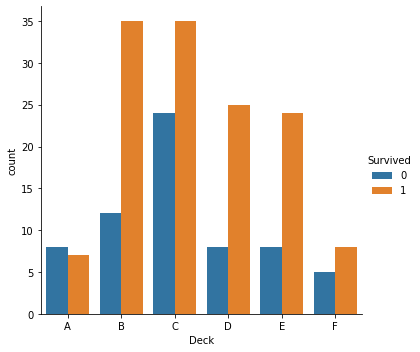

In [119]:
sns.factorplot('Deck',hue = 'Survived',data=deck_df, kind='count', order = ['A', 'B', 'C', 'D', 'E', 'F'])

### Did having a family member increase the odds of surviving the crash?

In [122]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


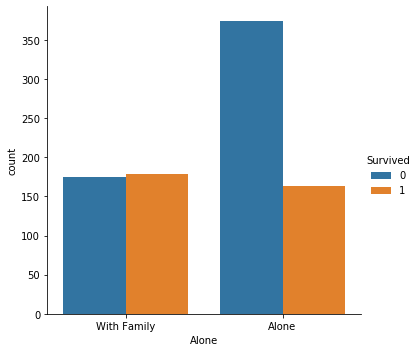

In [123]:
sns.factorplot('Alone', hue = 'Survived', kind = 'count', data = titanic_df)